**Business Problem :** High Customer Churn
<br>
**Business Objective :** Develop a model to predict which customers are likely to churn so the company can take proactive measures
<br>
**Success Metrics :** Reduce churn rate by 20% within 6 months

**Data Collection :** The dataset available at kaggle platform

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk

In [113]:
data=pd.read_csv('customer_churn_dataset-training-master.csv',sep=',')

Initial overview of your dataset, including its structure basic statistics, and potential data quality issues.

**Data Overview**

In [114]:
data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [115]:
data.shape

(440833, 12)

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [117]:
data.describe(include='all')

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832,440832.000000,440832.000000,440832.000000,440832.000000,440832,440832,440832.000000,440832.000000,440832.000000
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,NaN,NaN,NaN
top,NaN,NaN,Male,NaN,NaN,NaN,NaN,Standard,Annual,NaN,NaN,NaN
freq,NaN,NaN,250252,NaN,NaN,NaN,NaN,149128,177198,NaN,NaN,NaN
mean,225398.667955,39.373153,NaN,31.256336,15.807494,3.604437,12.965722,NaN,NaN,631.616223,14.480868,0.567107
std,129531.918550,12.442369,NaN,17.255727,8.586242,3.070218,8.258063,NaN,NaN,240.803001,8.596208,0.495477
min,2.000000,18.000000,NaN,1.000000,1.000000,0.000000,0.000000,NaN,NaN,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,NaN,16.000000,9.000000,1.000000,6.000000,NaN,NaN,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,NaN,32.000000,16.000000,3.000000,12.000000,NaN,NaN,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,NaN,46.000000,23.000000,6.000000,19.000000,NaN,NaN,830.000000,22.000000,1.000000


**Univariate Analysis**

In [118]:
data.isnull().sum()

,0
CustomerID,1
Age,1
Gender,1
Tenure,1
Usage Frequency,1
Support Calls,1
Payment Delay,1
Subscription Type,1
Contract Length,1
Total Spend,1


In [119]:
# prompt: print dataset index number where the null values i have

null_rows = data[data.isnull().any(axis=1)]
print(null_rows.index)

Index([199295], dtype='int64')


In [120]:
data.iloc[null_rows.index]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
data.drop(data.index[null_rows.index],inplace=True)

In [122]:
data.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0


In [123]:
import seaborn as sns

<Axes: >

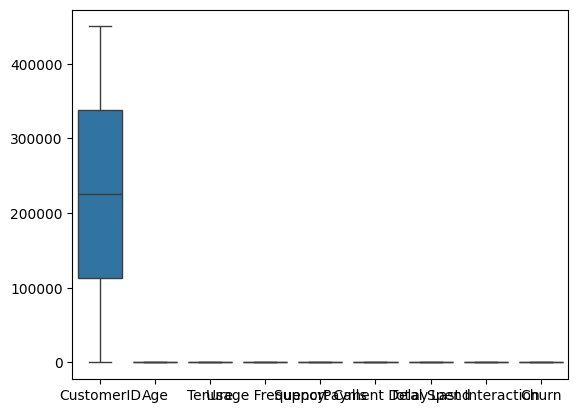

In [124]:
sns.boxplot(data)

In [125]:
data['CustomerID'].max() , data['CustomerID'].min()

(449999.0, 2.0)

In [126]:
data.drop('CustomerID',axis=1,inplace=True)

In [127]:
data.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [128]:
x=data.drop('Churn',axis=1)
y=data['Churn']

In [129]:
# prompt: seperate both catergorical columns and numerical columns from a dataset for individual analysis

# Separate categorical and numerical columns
categorical_cols = x.select_dtypes(include=['object']).columns.tolist()
numerical_cols = x.select_dtypes(include=['number']).columns.tolist()

# Create separate DataFrames for categorical and numerical features
x_categorical = x[categorical_cols]
x_numerical = x[numerical_cols]

# Now you can analyze x_categorical and x_numerical separately
# For example:
# print("Categorical Columns:")
# print(x_categorical.head())

# print("\nNumerical Columns:")
# print(x_numerical.head())

In [130]:
x_categorical.head()

,Gender,Subscription Type,Contract Length
0,Female,Standard,Annual
1,Female,Basic,Monthly
2,Female,Basic,Quarterly
3,Male,Standard,Monthly
4,Male,Basic,Monthly


In [131]:
x_numerical.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction
0,30.0,39.0,14.0,5.0,18.0,932.0,17.0
1,65.0,49.0,1.0,10.0,8.0,557.0,6.0
2,55.0,14.0,4.0,6.0,18.0,185.0,3.0
3,58.0,38.0,21.0,7.0,7.0,396.0,29.0
4,23.0,32.0,20.0,5.0,8.0,617.0,20.0


In [132]:
len(x_numerical)

440832

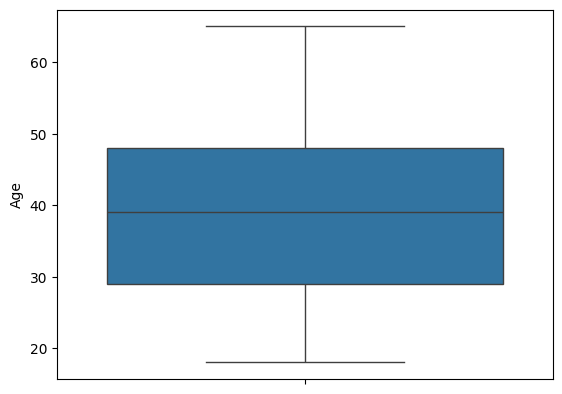

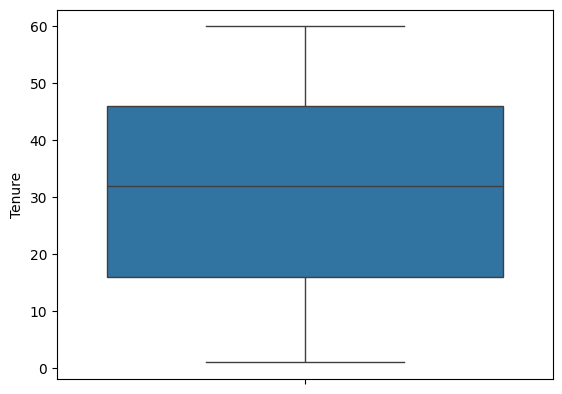

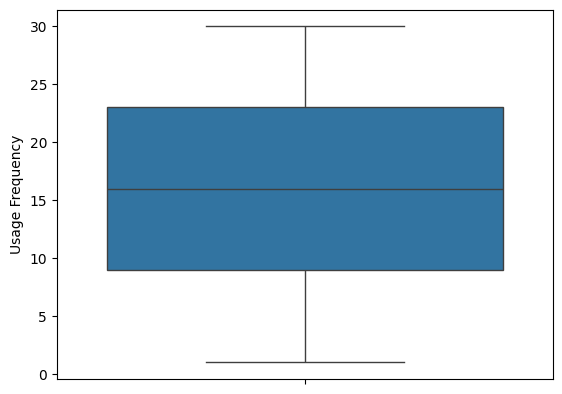

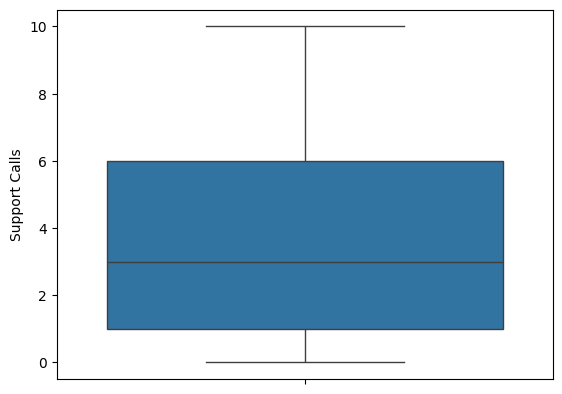

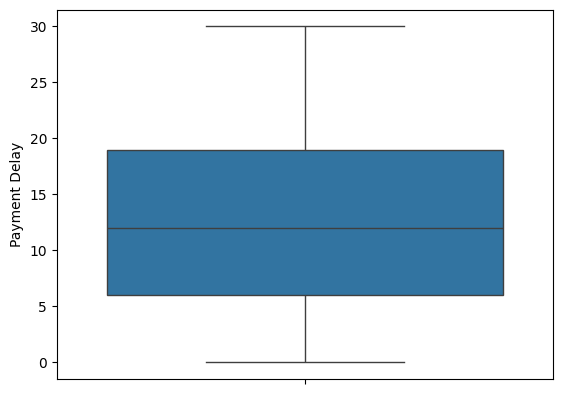

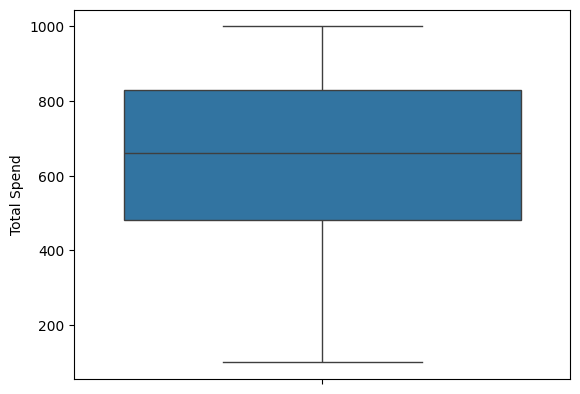

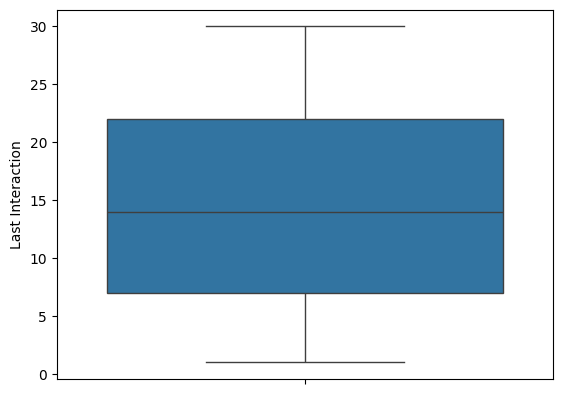

In [133]:
for j in range(len(x_numerical.columns)):
    sns.boxplot(x_numerical.iloc[:,j])
    plt.show()

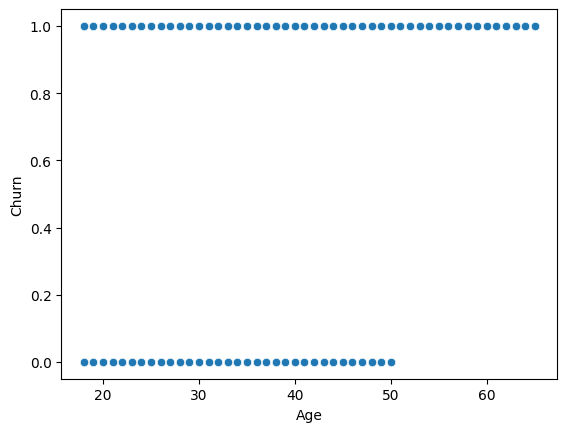

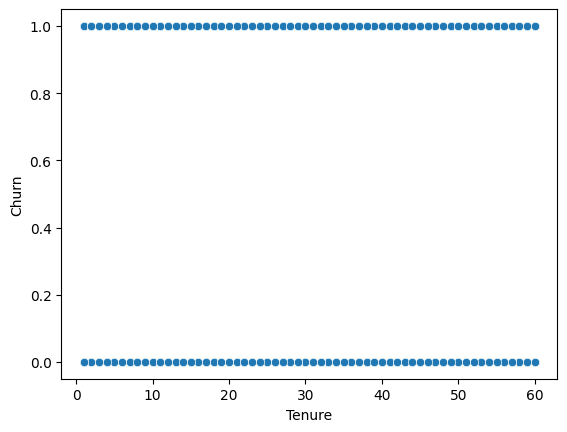

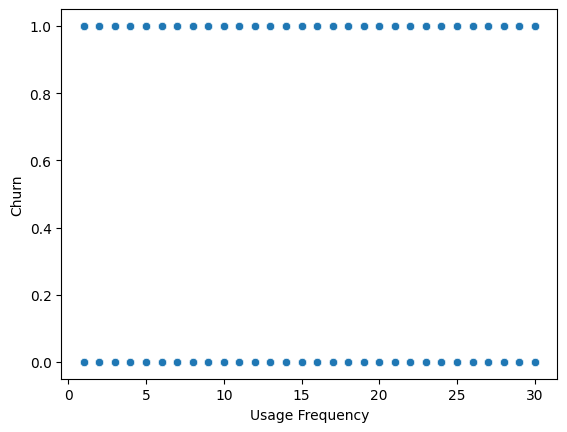

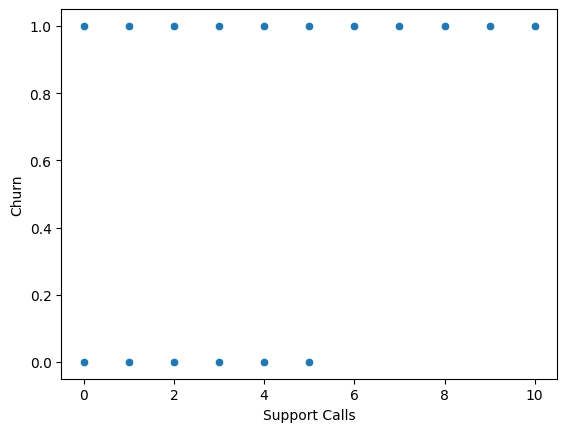

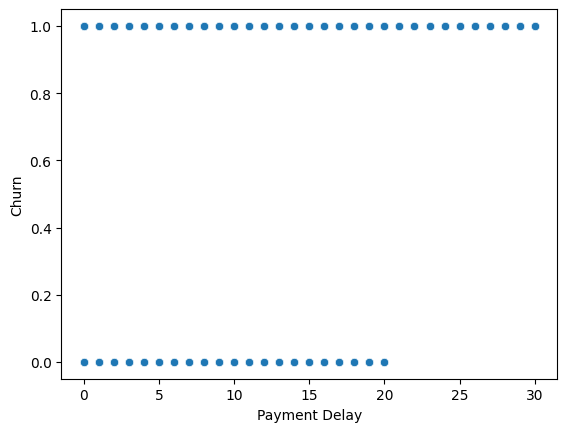

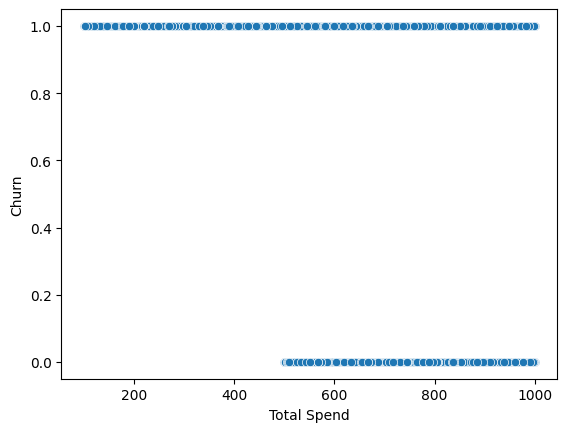

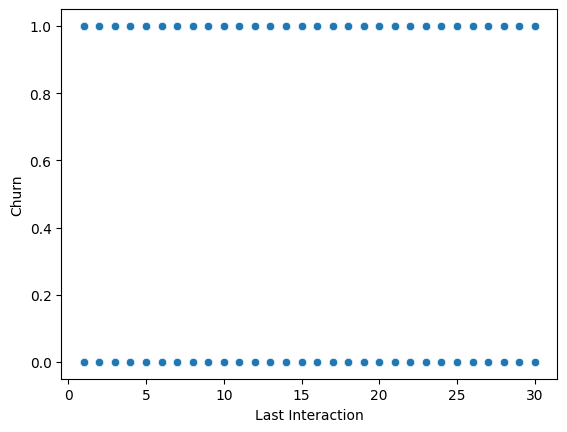

In [134]:
# prompt: for j in range(len(x_numerical.columns)):
#     sns.scatterplot(x_numerical.iloc[:,j],y)
#     plt.show()

for j in range(len(x_numerical.columns)):
    sns.scatterplot(x=x_numerical.iloc[:,j], y=y)
    plt.show()

**Bi-Variate Analysis**

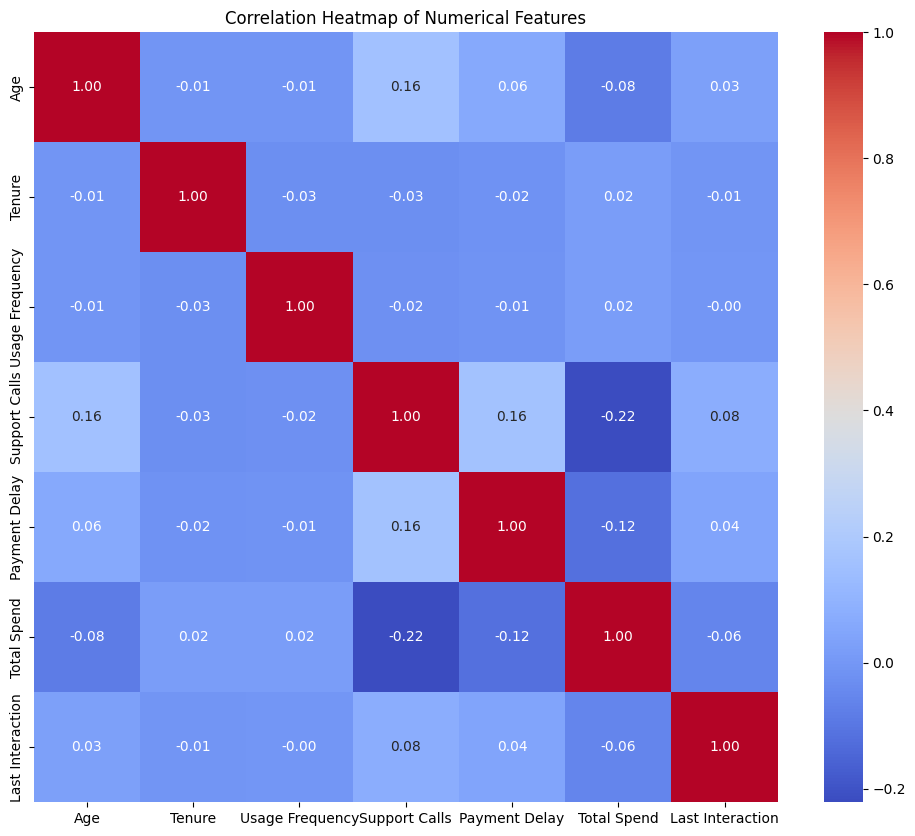

In [135]:
# prompt: perform heatmap on top of data variable only on numerical columns

# Assuming 'x_numerical' is your DataFrame with numerical columns
plt.figure(figsize=(12, 10))
sns.heatmap(x_numerical.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Correlation with Churn:
Support Calls       0.574267
Payment Delay       0.312129
Age                 0.218394
Last Interaction    0.149616
Usage Frequency    -0.046101
Tenure             -0.051919
Total Spend        -0.429355
dtype: float64


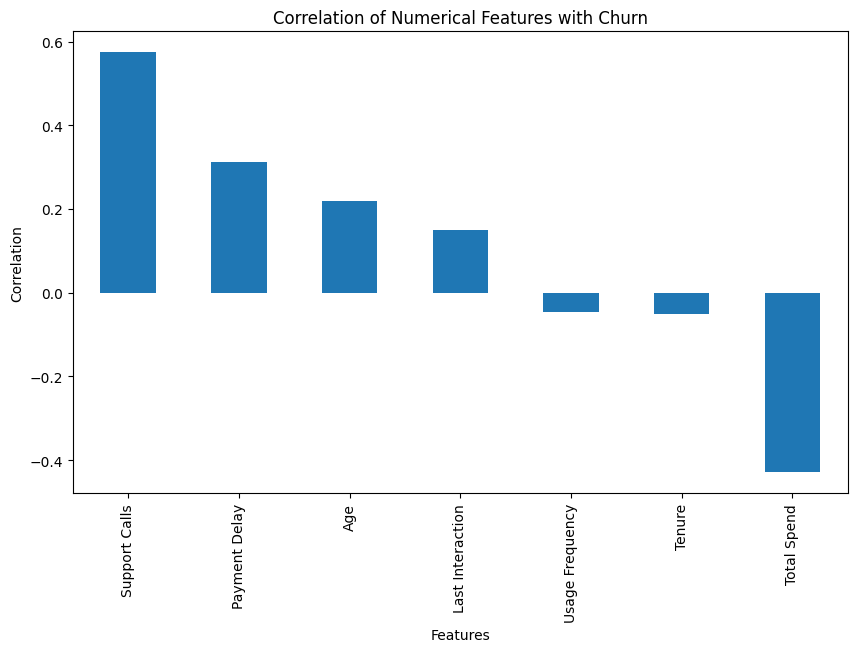


Strongly Correlated Features:
Support Calls       0.574267
Payment Delay       0.312129
Age                 0.218394
Last Interaction    0.149616
Total Spend        -0.429355
dtype: float64


In [136]:
# prompt: perform which columns are correlated to our target variable churn

# Calculate the correlation between numerical features and the target variable 'Churn'
correlation_with_target = x_numerical.corrwith(y)

# Sort the correlations in descending order to identify the most correlated features
correlation_with_target.sort_values(ascending=False, inplace=True)

print("Correlation with Churn:")
print(correlation_with_target)

# You can also visualize the correlation between the target variable and numerical features
plt.figure(figsize=(10, 6))
correlation_with_target.plot(kind='bar')
plt.title('Correlation of Numerical Features with Churn')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()

# To get a better sense of which columns are strongly correlated,
# you can set a threshold. For example, find features with a correlation
# greater than 0.1 (or any other threshold you find suitable) in absolute value:
strongly_correlated_features = correlation_with_target[abs(correlation_with_target) > 0.1]

print("\nStrongly Correlated Features:")
print(strongly_correlated_features)


In [137]:
# prompt: find a correation numerical value between churn means target variable and independent variables only using numerical variables

# Calculate the correlation between numerical features and the target variable 'Churn'
correlation_with_target = x_numerical.corrwith(y)

# Print the correlation values
print("Correlation with Churn:")
print(correlation_with_target)

Correlation with Churn:
Age                 0.218394
Tenure             -0.051919
Usage Frequency    -0.046101
Support Calls       0.574267
Payment Delay       0.312129
Total Spend        -0.429355
Last Interaction    0.149616
dtype: float64


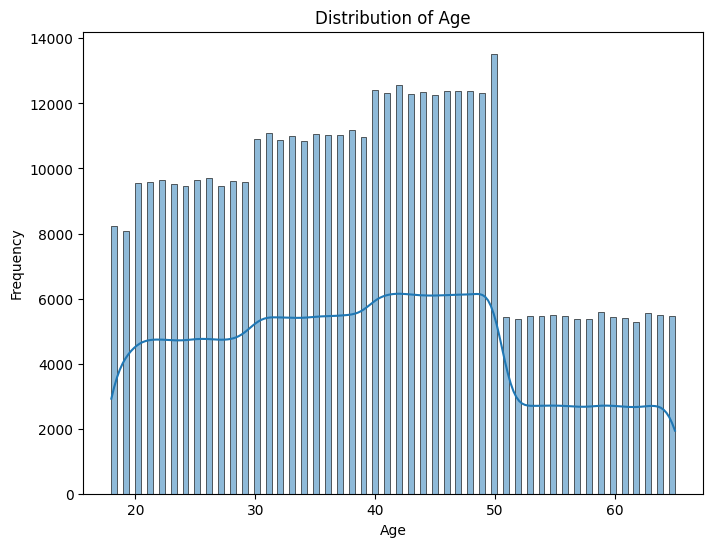

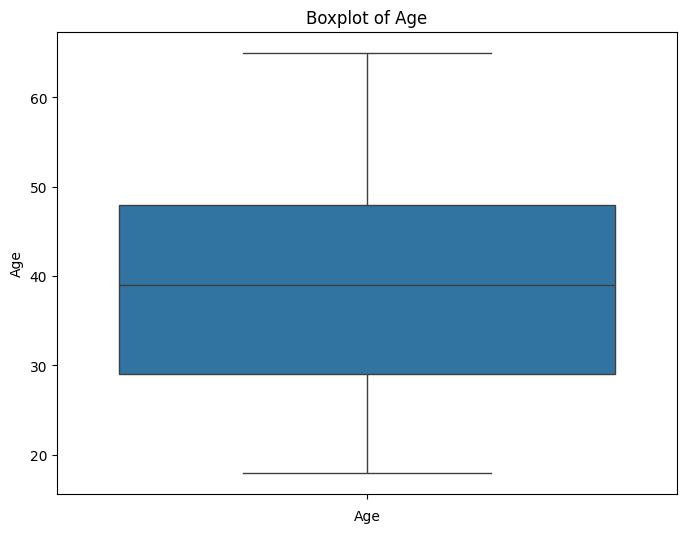

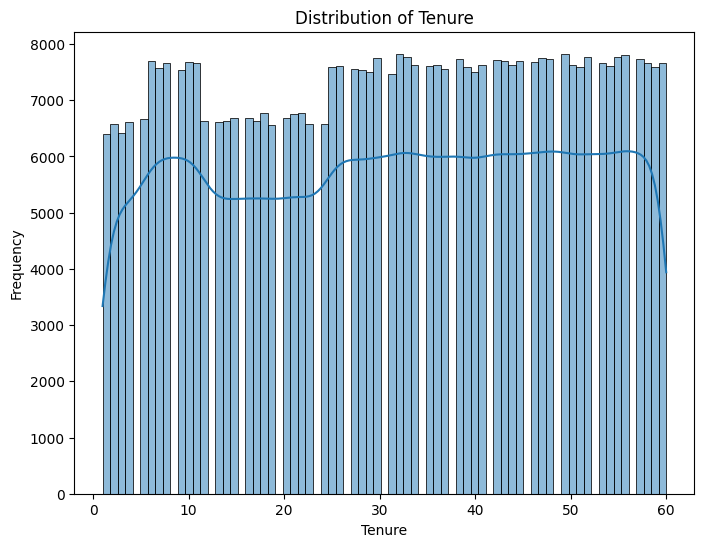

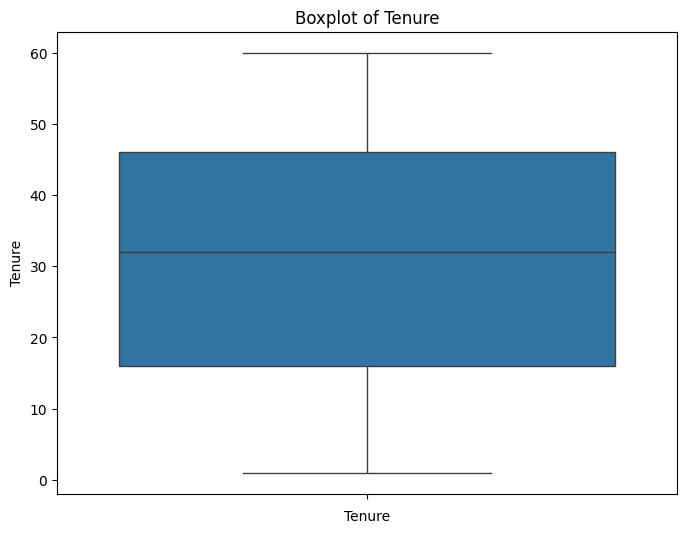

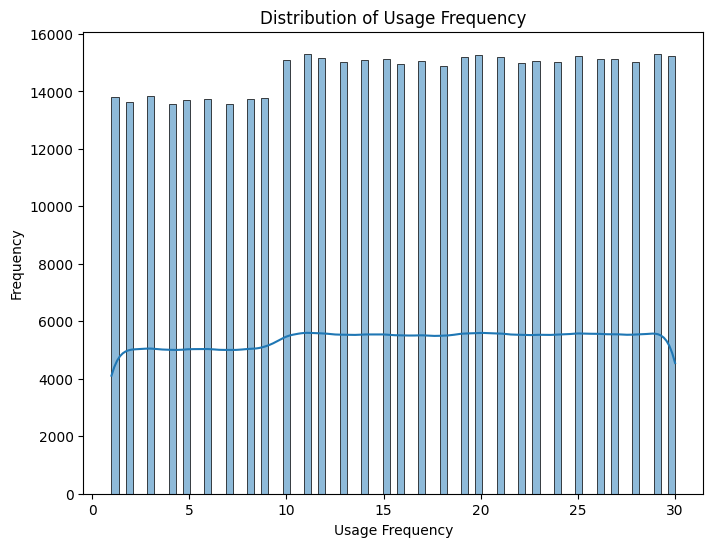

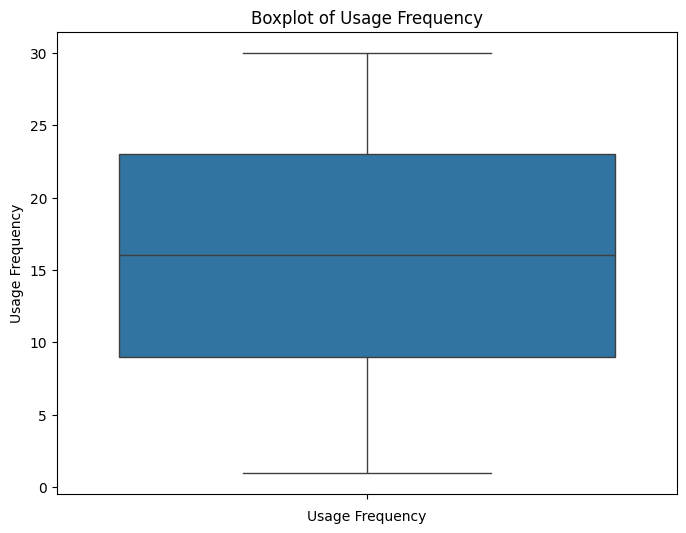

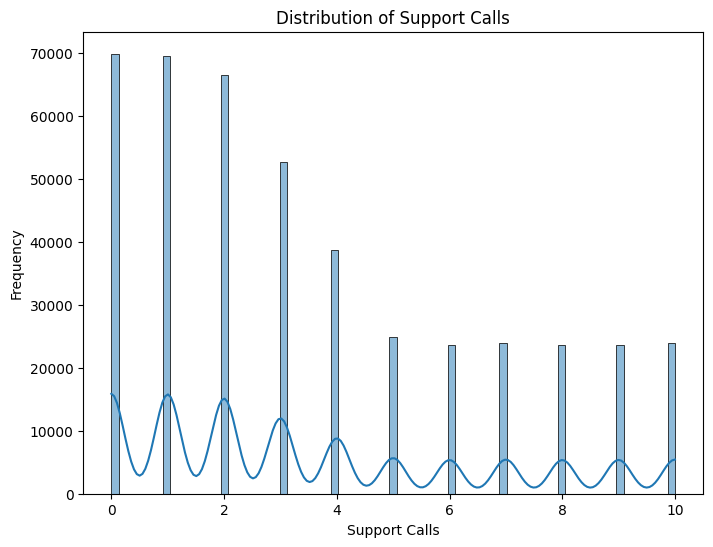

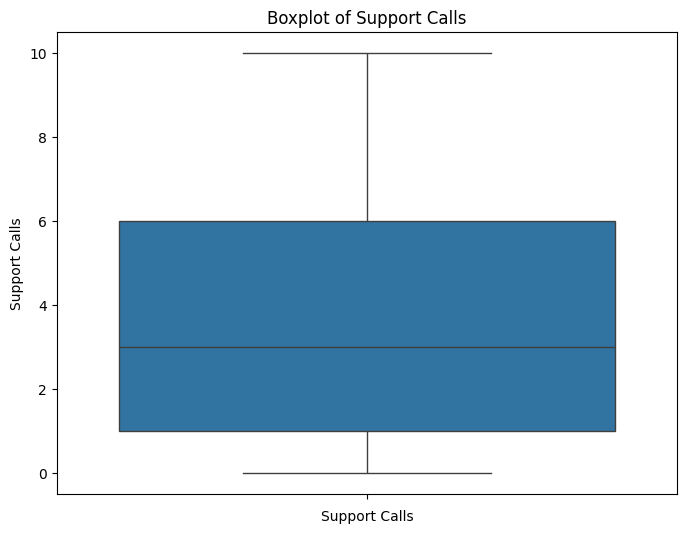

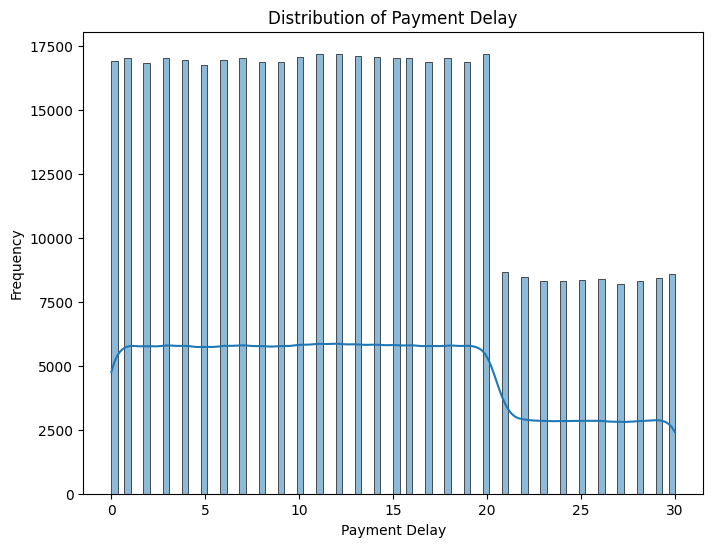

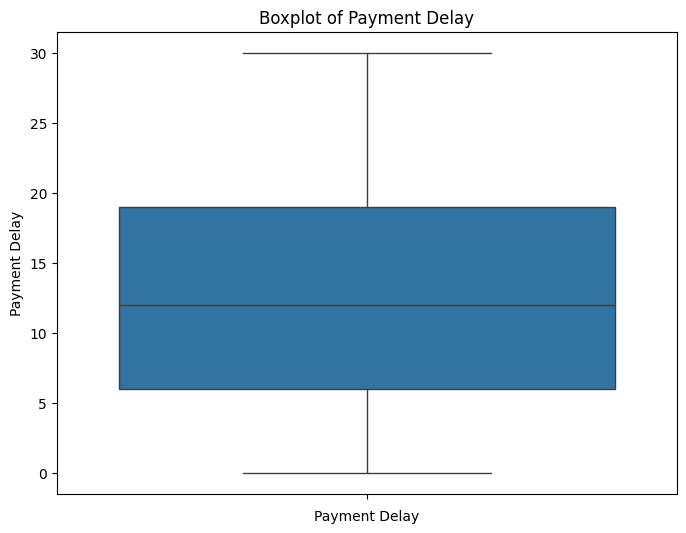

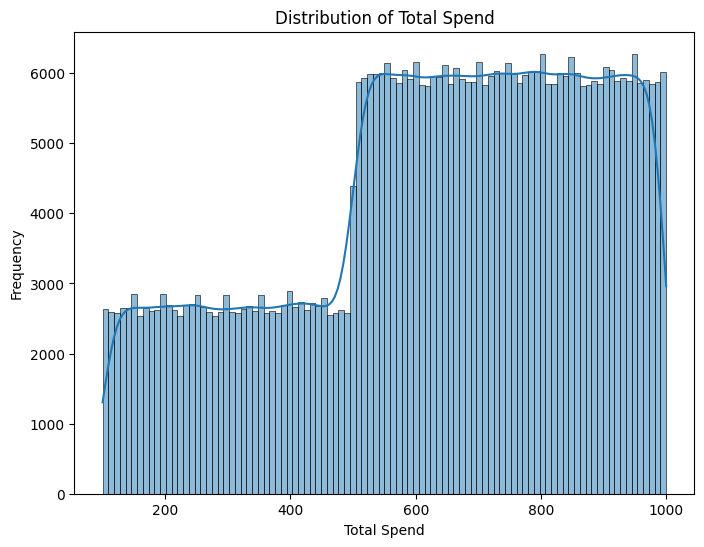

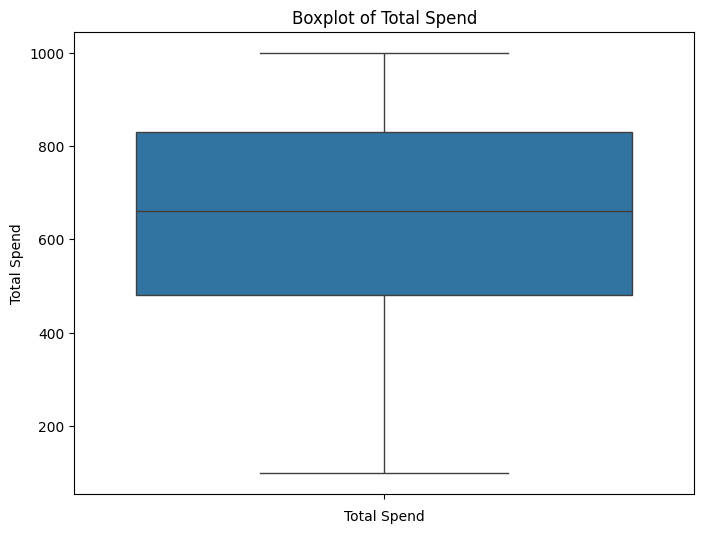

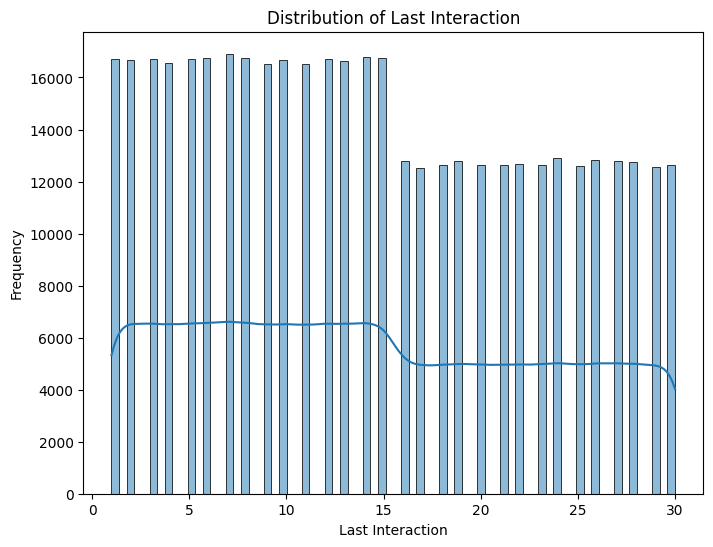

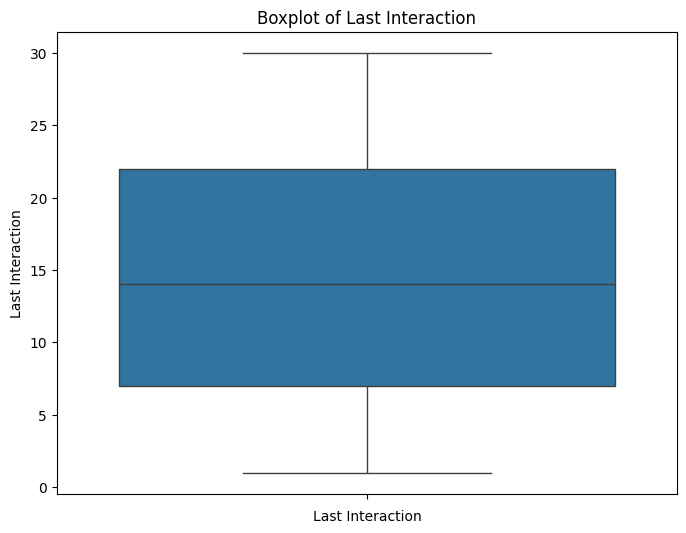

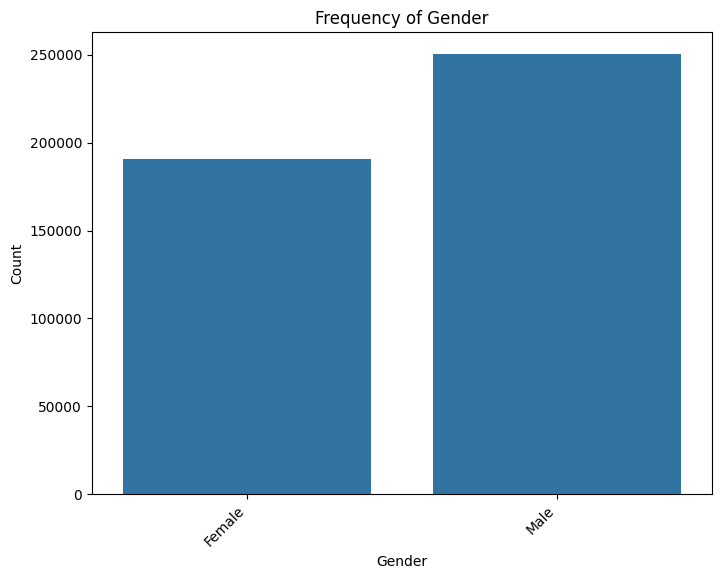

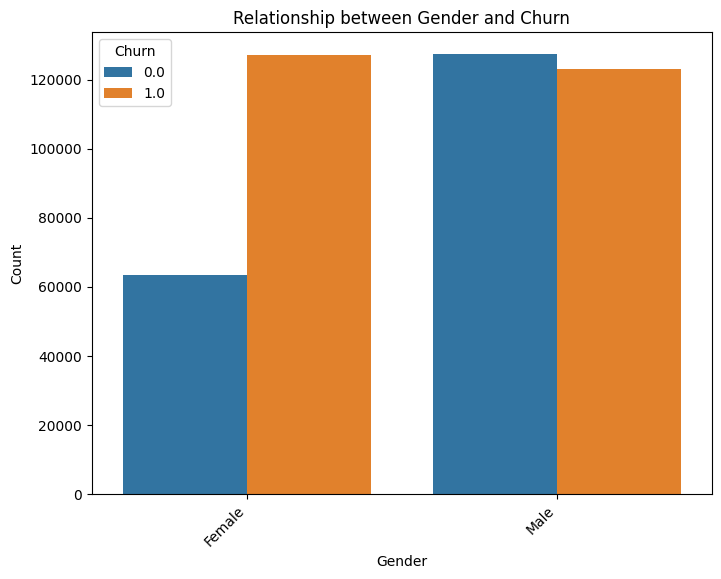

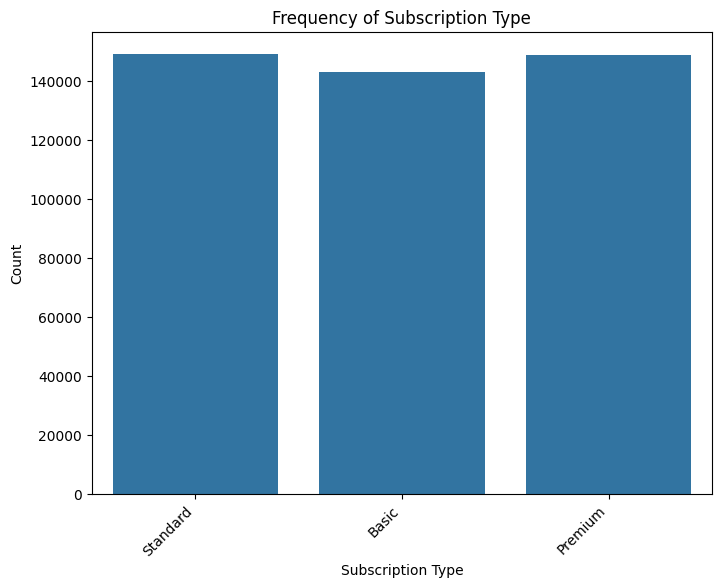

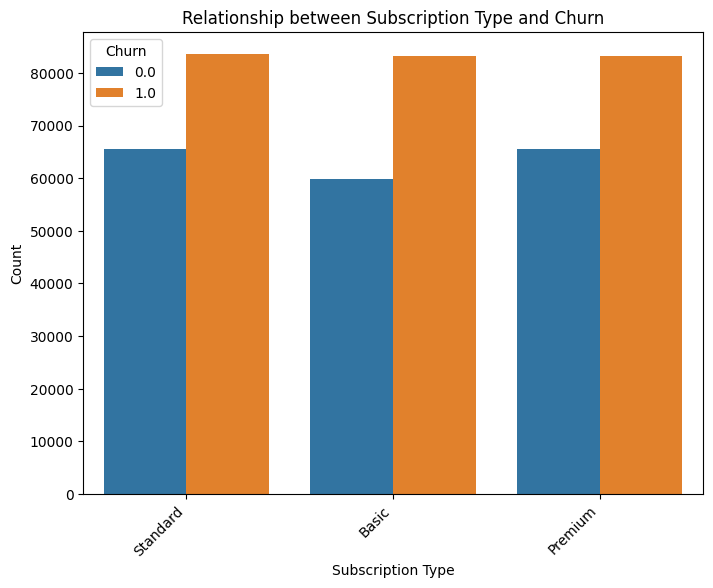

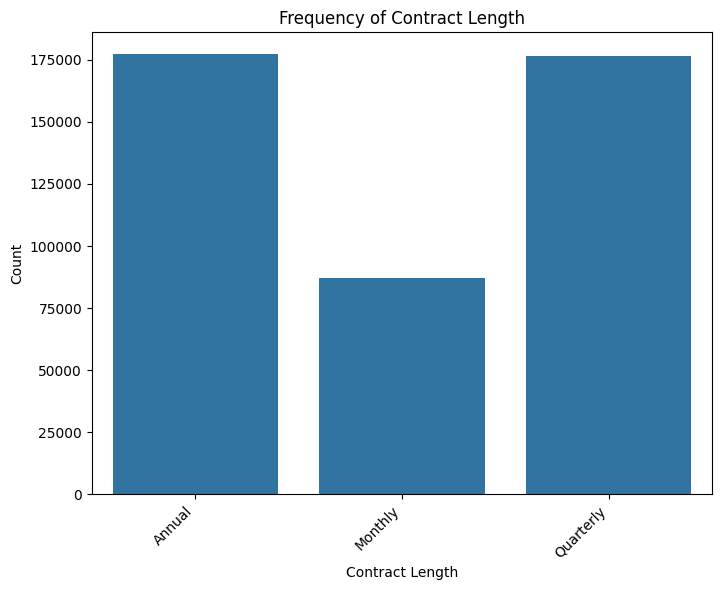

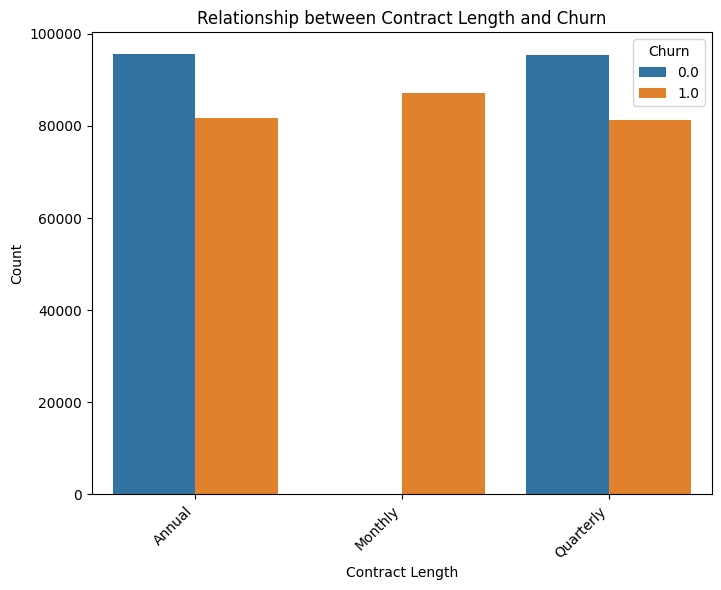

In [138]:
# prompt: perform eda on i mean univariate analysis

# Univariate Analysis for Numerical Features

for column in x_numerical.columns:
  plt.figure(figsize=(8, 6))
  sns.histplot(x_numerical[column], kde=True)
  plt.title(f'Distribution of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.show()

  plt.figure(figsize=(8, 6))
  sns.boxplot(x_numerical[column])
  plt.title(f'Boxplot of {column}')
  plt.xlabel(column)
  plt.show()


# Univariate Analysis for Categorical Features

for column in x_categorical.columns:
  plt.figure(figsize=(8, 6))
  sns.countplot(x=x_categorical[column])
  plt.title(f'Frequency of {column}')
  plt.xlabel(column)
  plt.ylabel('Count')
  plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
  plt.show()

  # Analyze the relationship between each categorical feature and the target variable
  plt.figure(figsize=(8, 6))
  sns.countplot(x=x_categorical[column], hue=y)  # Use 'hue' to show churn distribution
  plt.title(f'Relationship between {column} and Churn')
  plt.xlabel(column)
  plt.ylabel('Count')
  plt.xticks(rotation=45, ha='right')
  plt.show()

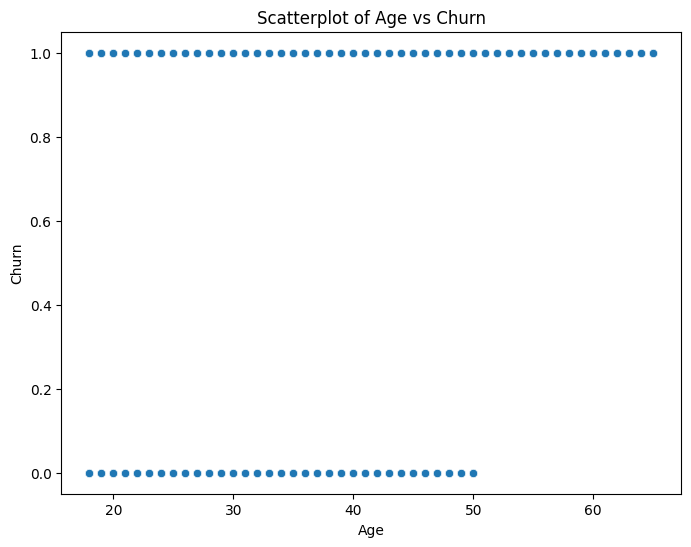

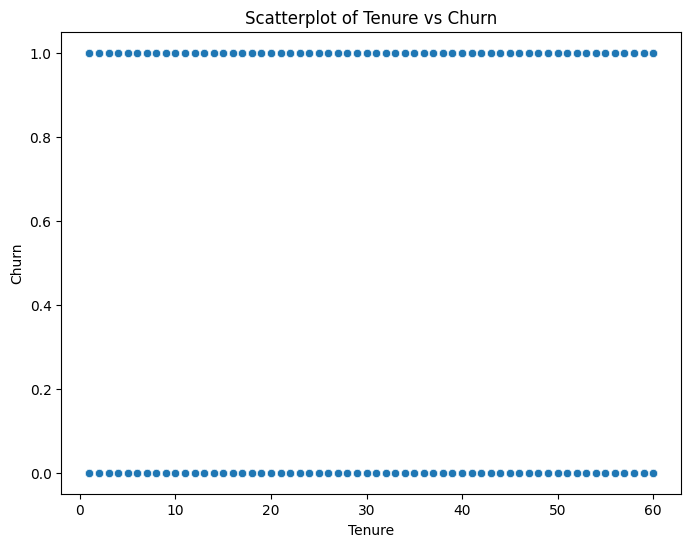

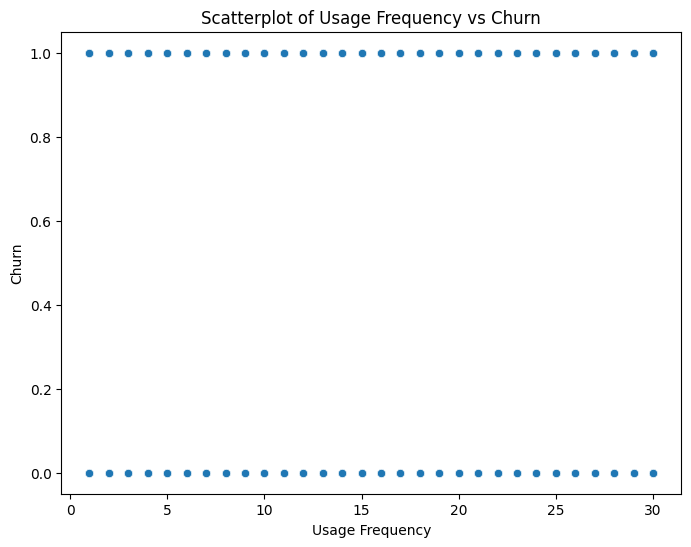

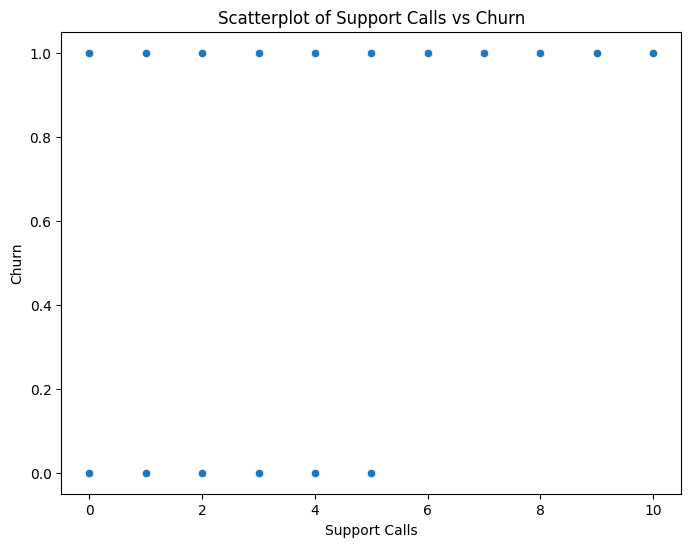

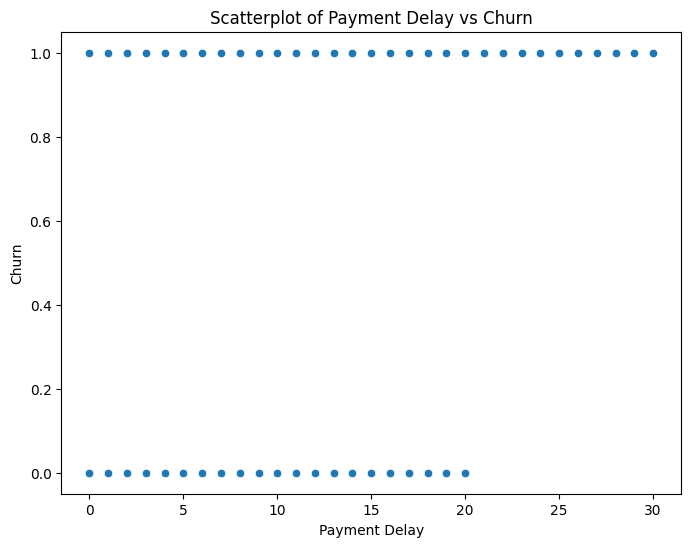

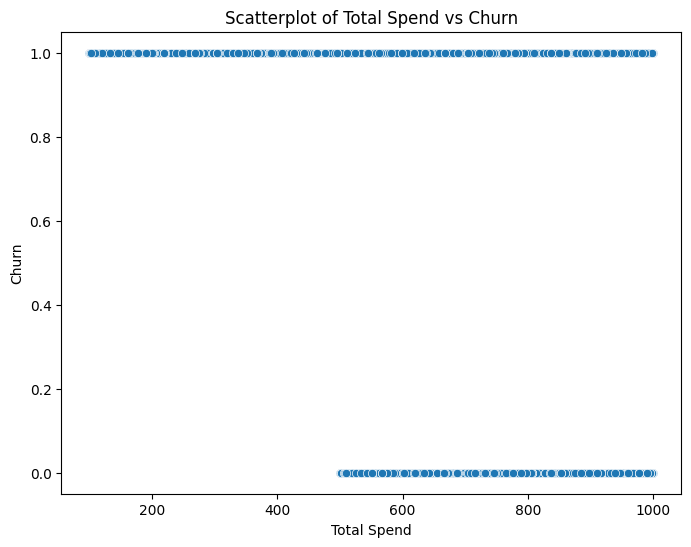

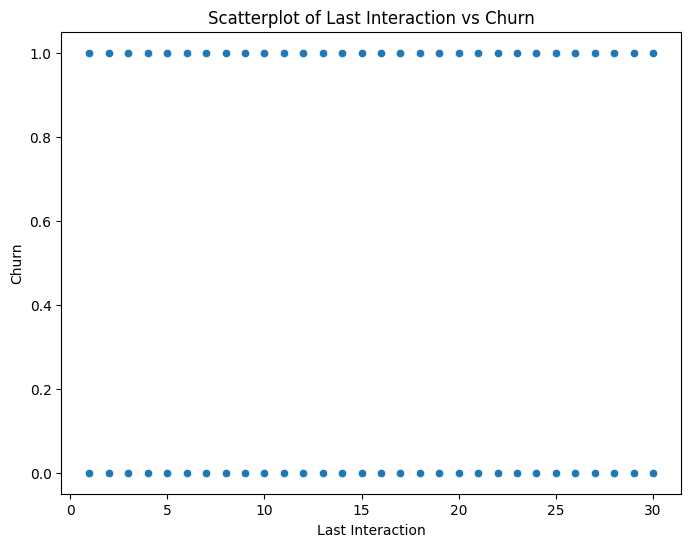

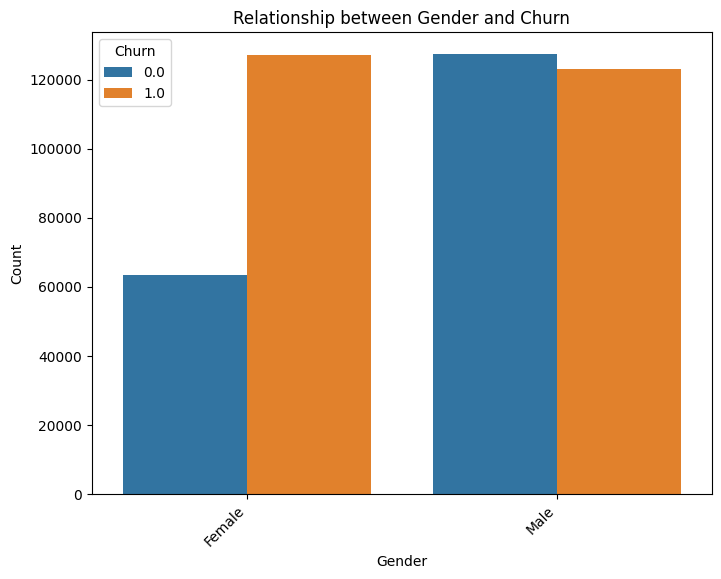

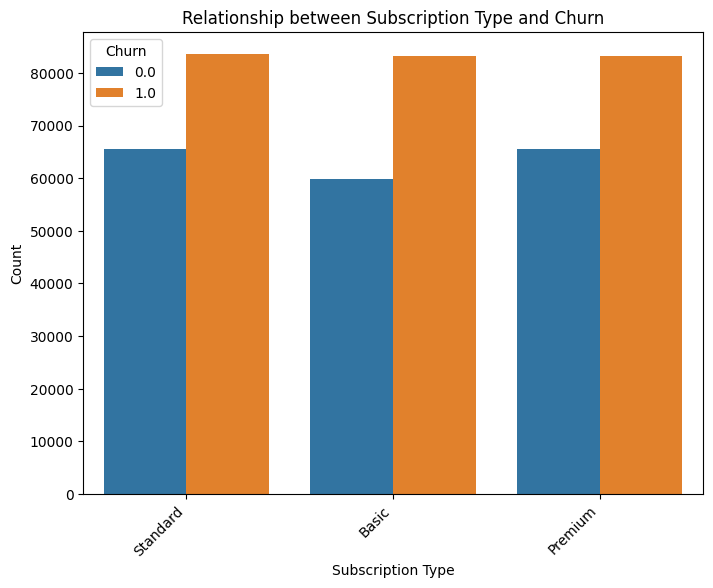

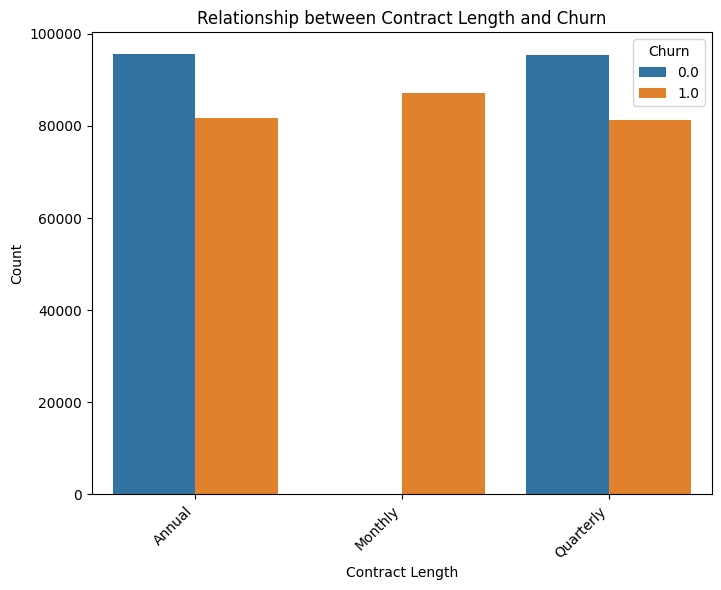

In [139]:
# prompt: pertform bivariate analysis on top of the data variable

# Bivariate Analysis for Numerical Features

for column in x_numerical.columns:
  plt.figure(figsize=(8, 6))
  sns.scatterplot(x=x_numerical[column], y=y)
  plt.title(f'Scatterplot of {column} vs Churn')
  plt.xlabel(column)
  plt.ylabel('Churn')
  plt.show()


# Bivariate Analysis for Categorical Features

for column in x_categorical.columns:
  plt.figure(figsize=(8, 6))
  sns.countplot(x=x_categorical[column], hue=y)
  plt.title(f'Relationship between {column} and Churn')
  plt.xlabel(column)
  plt.ylabel('Count')
  plt.xticks(rotation=45, ha='right')
  plt.show()

**Multi Variate Analysis**

In [140]:
# Analyze the interaction between multiple numerical features and the target variable
sns.pairplot(pd.concat([x_numerical, y], axis=1), hue='Churn')
plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7b79d38b8ee0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7b79d38b8160> (for post_execute):


KeyboardInterrupt: 

[0.20726424 0.1466887  0.13976236 0.13839831 0.13438148 0.12563231
 0.10787261]


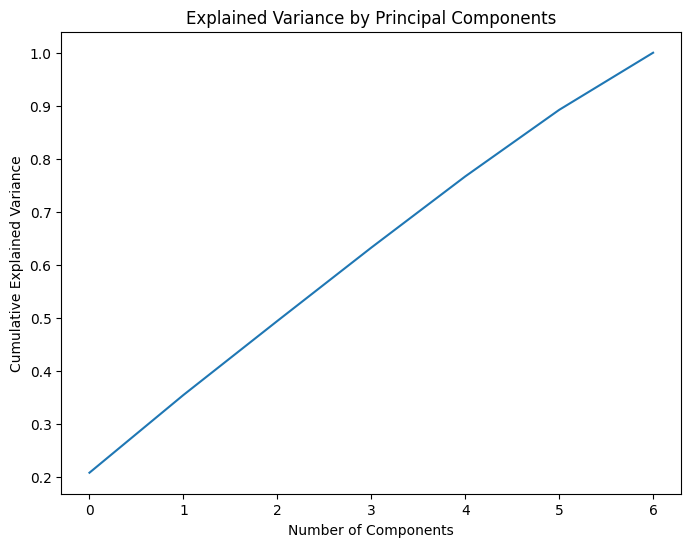

In [40]:
# prompt: perform pca on top of data variable

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming x_numerical contains your numerical features
x_numerical_scaled = StandardScaler().fit_transform(x_numerical)

# Apply PCA
pca = PCA(n_components=0.95)  # Keep components explaining 95% of variance
principal_components = pca.fit_transform(x_numerical_scaled)

# Create a DataFrame with principal components
principal_df = pd.DataFrame(data=principal_components)

# You can analyze the explained variance ratio
print(pca.explained_variance_ratio_)

# You can also plot the explained variance to determine the number of components
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()


In [141]:
data.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [142]:
churnning=data['Churn']

In [143]:
data.columns

Index(['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend',
       'Last Interaction', 'Churn'],
      dtype='object')

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440832 entries, 0 to 440832
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                440832 non-null  float64
 1   Gender             440832 non-null  object 
 2   Tenure             440832 non-null  float64
 3   Usage Frequency    440832 non-null  float64
 4   Support Calls      440832 non-null  float64
 5   Payment Delay      440832 non-null  float64
 6   Subscription Type  440832 non-null  object 
 7   Contract Length    440832 non-null  object 
 8   Total Spend        440832 non-null  float64
 9   Last Interaction   440832 non-null  float64
 10  Churn              440832 non-null  float64
dtypes: float64(8), object(3)
memory usage: 40.4+ MB


In [145]:
# prompt: correct this code 'encoding=encding['Female'].astype(int64)'

encoding = pd.get_dummies(data['Gender'], dtype=np.int64)
encoding

,Female,Male
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1
...,...,...
440828,0,1
440829,1,0
440830,0,1
440831,0,1


In [146]:
# prompt: concat both data and encoding featutures by the axis =1

# Assuming x_numerical and x_encoded are your DataFrames
x_combined = pd.concat([data, encoding], axis=1)

In [147]:
df=x_combined.copy()

In [148]:
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Female,Male
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0,1,0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0,1,0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0,1,0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0,0,1
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0,0,1


In [149]:
df.drop(['Gender'],axis=1,inplace=True)

In [150]:
df.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Female,Male
0,30.0,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0,1,0
1,65.0,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0,1,0
2,55.0,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0,1,0
3,58.0,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0,0,1
4,23.0,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0,0,1


In [151]:
data['Subscription Type'].value_counts()

,count
Subscription Type,
Standard,149128
Premium,148678
Basic,143026


In [152]:
# prompt: correct this code 'encoding=encding['Female'].astype(int64)'

encoding = pd.get_dummies(df['Subscription Type'], dtype=np.int64)
encoding

,Basic,Premium,Standard
0,0,0,1
1,1,0,0
2,1,0,0
3,0,0,1
4,1,0,0
...,...,...,...
440828,0,1,0
440829,0,1,0
440830,0,0,1
440831,0,0,1


In [153]:
# prompt: concat both data and encoding featutures by the axis =1

# Assuming x_numerical and x_encoded are your Dak
k= pd.concat([df, encoding], axis=1)

In [154]:
k.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Female,Male,Basic,Premium,Standard
0,30.0,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0,1,0,0,0,1
1,65.0,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0,1,0,1,0,0
2,55.0,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0,1,0,1,0,0
3,58.0,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0,0,1,0,0,1
4,23.0,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0,0,1,1,0,0


In [155]:
k.drop(['Subscription Type'],axis=1,inplace=True)

In [156]:
k.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Contract Length,Total Spend,Last Interaction,Churn,Female,Male,Basic,Premium,Standard
0,30.0,39.0,14.0,5.0,18.0,Annual,932.0,17.0,1.0,1,0,0,0,1
1,65.0,49.0,1.0,10.0,8.0,Monthly,557.0,6.0,1.0,1,0,1,0,0
2,55.0,14.0,4.0,6.0,18.0,Quarterly,185.0,3.0,1.0,1,0,1,0,0
3,58.0,38.0,21.0,7.0,7.0,Monthly,396.0,29.0,1.0,0,1,0,0,1
4,23.0,32.0,20.0,5.0,8.0,Monthly,617.0,20.0,1.0,0,1,1,0,0


In [157]:
k['Contract Length'].value_counts()

,count
Contract Length,
Annual,177198
Quarterly,176530
Monthly,87104


In [158]:
# prompt: correct this code 'encoding=encding['Female'].astype(int64)'

encode = pd.get_dummies(df['Contract Length'], dtype=np.int64)
encode

,Annual,Monthly,Quarterly
0,1,0,0
1,0,1,0
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
440828,1,0,0
440829,1,0,0
440830,0,0,1
440831,0,0,1


In [159]:
df= pd.concat([k, encode], axis=1)

In [160]:
df.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Contract Length,Total Spend,Last Interaction,Churn,Female,Male,Basic,Premium,Standard,Annual,Monthly,Quarterly
0,30.0,39.0,14.0,5.0,18.0,Annual,932.0,17.0,1.0,1,0,0,0,1,1,0,0
1,65.0,49.0,1.0,10.0,8.0,Monthly,557.0,6.0,1.0,1,0,1,0,0,0,1,0
2,55.0,14.0,4.0,6.0,18.0,Quarterly,185.0,3.0,1.0,1,0,1,0,0,0,0,1
3,58.0,38.0,21.0,7.0,7.0,Monthly,396.0,29.0,1.0,0,1,0,0,1,0,1,0
4,23.0,32.0,20.0,5.0,8.0,Monthly,617.0,20.0,1.0,0,1,1,0,0,0,1,0


In [161]:
df.drop(['Contract Length'],axis=1,inplace=True)

In [162]:
x=df.drop(['Churn'],axis=1,inplace=False)

In [163]:
y=data['Churn']

In [165]:
x

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Female,Male,Basic,Premium,Standard,Annual,Monthly,Quarterly
0,30.0,39.0,14.0,5.0,18.0,932.00,17.0,1,0,0,0,1,1,0,0
1,65.0,49.0,1.0,10.0,8.0,557.00,6.0,1,0,1,0,0,0,1,0
2,55.0,14.0,4.0,6.0,18.0,185.00,3.0,1,0,1,0,0,0,0,1
3,58.0,38.0,21.0,7.0,7.0,396.00,29.0,0,1,0,0,1,0,1,0
4,23.0,32.0,20.0,5.0,8.0,617.00,20.0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440828,42.0,54.0,15.0,1.0,3.0,716.38,8.0,0,1,0,1,0,1,0,0
440829,25.0,8.0,13.0,1.0,20.0,745.38,2.0,1,0,0,1,0,1,0,0
440830,26.0,35.0,27.0,1.0,5.0,977.31,9.0,0,1,0,0,1,0,0,1
440831,28.0,55.0,14.0,2.0,0.0,602.55,2.0,0,1,0,0,1,0,0,1


In [166]:
y

,Churn
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
440828,0.0
440829,0.0
440830,0.0
440831,0.0


In [167]:
x

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Female,Male,Basic,Premium,Standard,Annual,Monthly,Quarterly
0,30.0,39.0,14.0,5.0,18.0,932.00,17.0,1,0,0,0,1,1,0,0
1,65.0,49.0,1.0,10.0,8.0,557.00,6.0,1,0,1,0,0,0,1,0
2,55.0,14.0,4.0,6.0,18.0,185.00,3.0,1,0,1,0,0,0,0,1
3,58.0,38.0,21.0,7.0,7.0,396.00,29.0,0,1,0,0,1,0,1,0
4,23.0,32.0,20.0,5.0,8.0,617.00,20.0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440828,42.0,54.0,15.0,1.0,3.0,716.38,8.0,0,1,0,1,0,1,0,0
440829,25.0,8.0,13.0,1.0,20.0,745.38,2.0,1,0,0,1,0,1,0,0
440830,26.0,35.0,27.0,1.0,5.0,977.31,9.0,0,1,0,0,1,0,0,1
440831,28.0,55.0,14.0,2.0,0.0,602.55,2.0,0,1,0,0,1,0,0,1


In [168]:
y=df['Churn']

In [169]:
y.shape

(440832,)

In [170]:
x.shape

(440832, 15)

In [171]:
# prompt: perform feature scaling on top of df dataframe

from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame with numerical features
numerical_features = x.select_dtypes(include=['number']).columns.tolist()
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(x[numerical_features])

In [172]:
df.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Female,Male,Basic,Premium,Standard,Annual,Monthly,Quarterly
0,-0.753326,0.448760,-0.210511,0.454549,0.609620,1.247427,0.293052,1.0,1.145909,-1.145909,-0.693012,-0.713374,1.398594,1.219751,-0.496232,-0.817258
1,2.059646,1.028278,-1.724562,2.083100,-0.601319,-0.309865,-0.986584,1.0,1.145909,-1.145909,1.442976,-0.713374,-0.715004,-0.819839,2.015188,-0.817258
2,1.255940,-1.000036,-1.375166,0.780259,0.609620,-1.854698,-1.335575,1.0,1.145909,-1.145909,1.442976,-0.713374,-0.715004,-0.819839,-0.496232,1.223604
3,1.497051,0.390808,0.604748,1.105969,-0.722413,-0.978462,1.689018,1.0,-0.872670,0.872670,-0.693012,-0.713374,1.398594,-0.819839,2.015188,-0.817258
4,-1.315921,0.043097,0.488282,0.454549,-0.601319,-0.060698,0.642043,1.0,-0.872670,0.872670,1.442976,-0.713374,-0.715004,-0.819839,2.015188,-0.817258


Correlation with Churn:
Age                 0.218394
Tenure             -0.051919
Usage Frequency    -0.046101
Support Calls       0.574267
Payment Delay       0.312129
Total Spend        -0.429355
Last Interaction    0.149616
Female              0.175395
Male               -0.175395
Basic               0.020526
Premium            -0.011072
Standard           -0.009247
Annual             -0.175965
Monthly             0.433553
Quarterly          -0.176244
Name: Churn, dtype: float64


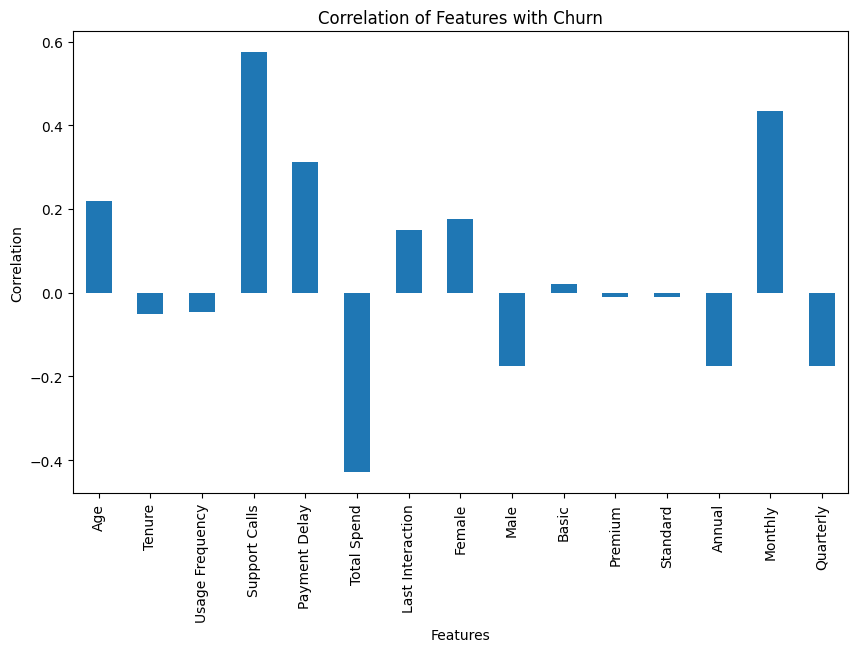


Strongly Correlated Features:
Age                 0.218394
Support Calls       0.574267
Payment Delay       0.312129
Total Spend        -0.429355
Last Interaction    0.149616
Female              0.175395
Male               -0.175395
Annual             -0.175965
Monthly             0.433553
Quarterly          -0.176244
Name: Churn, dtype: float64


In [173]:
# prompt: perform correlation analysis with independent variables with respect to the target variable on df

# Calculate the correlation between independent variables and the target variable 'Churn'
correlation_with_target = df.corr()['Churn']

# Remove the correlation of the target variable with itself
correlation_with_target = correlation_with_target.drop('Churn')

# Print the correlation values
print("Correlation with Churn:")
print(correlation_with_target)

# You can also visualize the correlation between the target variable and other features
plt.figure(figsize=(10, 6))
correlation_with_target.plot(kind='bar')
plt.title('Correlation of Features with Churn')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()

# To get a better sense of which columns are strongly correlated,
# you can set a threshold. For example, find features with a correlation
# greater than 0.1 (or any other threshold you find suitable) in absolute value:
strongly_correlated_features = correlation_with_target[abs(correlation_with_target) > 0.1]

print("\nStrongly Correlated Features:")
print(strongly_correlated_features)

**Highly Correlated features are**


1.   Support Calls
2.   Monthly
3.   Total Spend
4.   Payment Delay
5.   Age
6.   Last Interaction
7.   Female
8.   Male
9.   Annual
10.  Quartely




Correlation between Total Spend and Churn: -0.4293548243215326


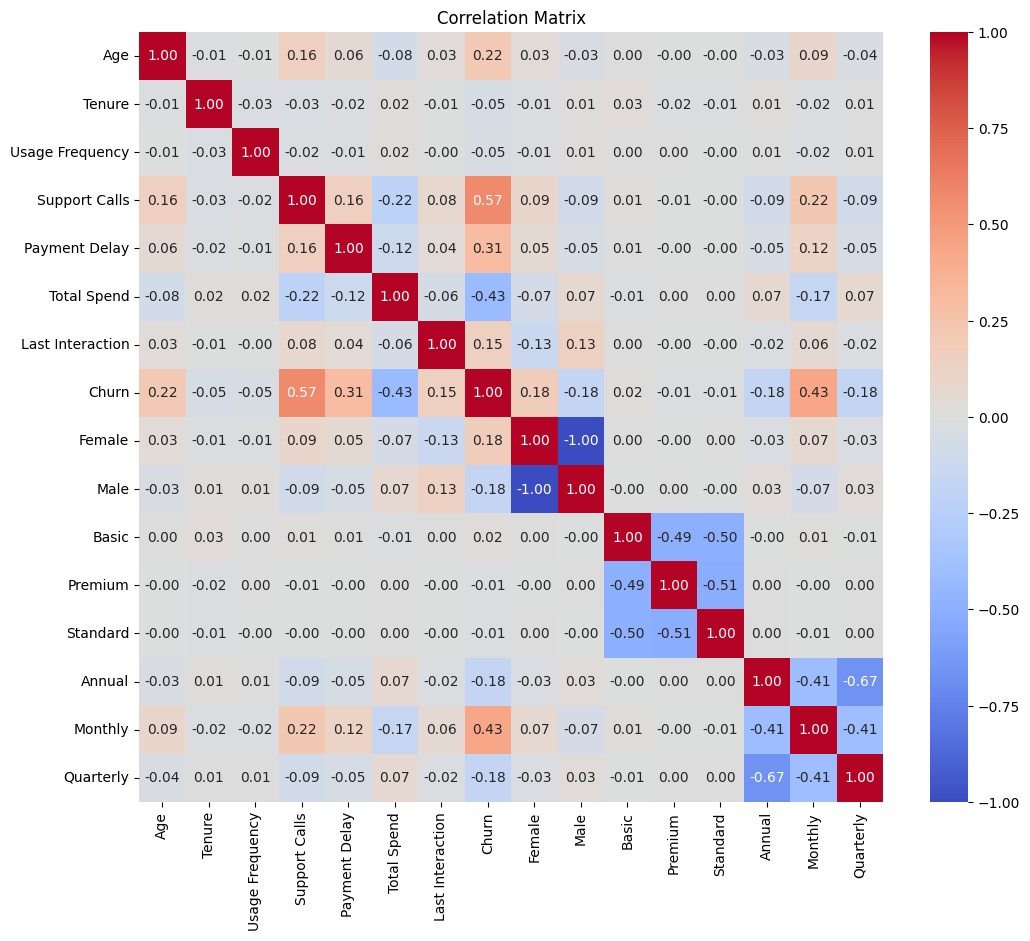

In [174]:
# prompt: which function can i use to find the correlation between 2 features

# Assuming 'df' is your DataFrame
correlation_matrix = df.corr()

# To find the correlation between two specific features, e.g., 'Total Spend' and 'Churn':
correlation_total_spend_churn = correlation_matrix.loc['Total Spend', 'Churn']
print(f"Correlation between Total Spend and Churn: {correlation_total_spend_churn}")

# You can also visualize the correlation matrix using a heatmap:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [175]:
df.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Female,Male,Basic,Premium,Standard,Annual,Monthly,Quarterly
0,-0.753326,0.448760,-0.210511,0.454549,0.609620,1.247427,0.293052,1.0,1.145909,-1.145909,-0.693012,-0.713374,1.398594,1.219751,-0.496232,-0.817258
1,2.059646,1.028278,-1.724562,2.083100,-0.601319,-0.309865,-0.986584,1.0,1.145909,-1.145909,1.442976,-0.713374,-0.715004,-0.819839,2.015188,-0.817258
2,1.255940,-1.000036,-1.375166,0.780259,0.609620,-1.854698,-1.335575,1.0,1.145909,-1.145909,1.442976,-0.713374,-0.715004,-0.819839,-0.496232,1.223604
3,1.497051,0.390808,0.604748,1.105969,-0.722413,-0.978462,1.689018,1.0,-0.872670,0.872670,-0.693012,-0.713374,1.398594,-0.819839,2.015188,-0.817258
4,-1.315921,0.043097,0.488282,0.454549,-0.601319,-0.060698,0.642043,1.0,-0.872670,0.872670,1.442976,-0.713374,-0.715004,-0.819839,2.015188,-0.817258


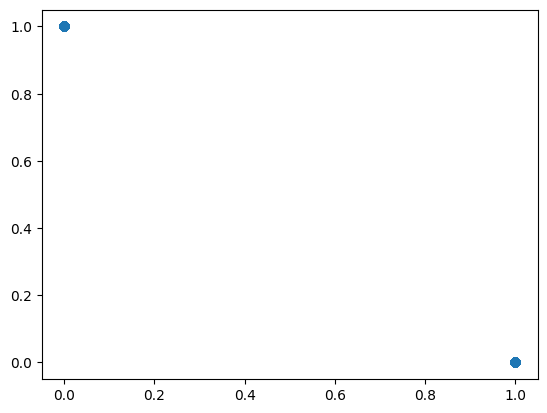

In [176]:
plt.scatter(x=x_combined['Male'],y=x_combined['Female'])

In [177]:
k=list(strongly_correlated_features)

In [71]:
k.sort()
print(k)

[-0.4293548243215286, -0.17624446025314602, -0.17596497597830246, -0.17539471194052805, 0.14961599724949984, 0.1753947119405281, 0.2183939185771097, 0.3121292757413262, 0.4335527381621286, 0.5742671326590193]


In [178]:
df.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Female,Male,Basic,Premium,Standard,Annual,Monthly,Quarterly
0,-0.753326,0.448760,-0.210511,0.454549,0.609620,1.247427,0.293052,1.0,1.145909,-1.145909,-0.693012,-0.713374,1.398594,1.219751,-0.496232,-0.817258
1,2.059646,1.028278,-1.724562,2.083100,-0.601319,-0.309865,-0.986584,1.0,1.145909,-1.145909,1.442976,-0.713374,-0.715004,-0.819839,2.015188,-0.817258
2,1.255940,-1.000036,-1.375166,0.780259,0.609620,-1.854698,-1.335575,1.0,1.145909,-1.145909,1.442976,-0.713374,-0.715004,-0.819839,-0.496232,1.223604
3,1.497051,0.390808,0.604748,1.105969,-0.722413,-0.978462,1.689018,1.0,-0.872670,0.872670,-0.693012,-0.713374,1.398594,-0.819839,2.015188,-0.817258
4,-1.315921,0.043097,0.488282,0.454549,-0.601319,-0.060698,0.642043,1.0,-0.872670,0.872670,1.442976,-0.713374,-0.715004,-0.819839,2.015188,-0.817258


In [179]:
x=df.drop(['Churn'],axis=1,inplace=False)

In [180]:
y=df['Churn']

In [181]:
x.columns

Index(['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay',
       'Total Spend', 'Last Interaction', 'Female', 'Male', 'Basic', 'Premium',
       'Standard', 'Annual', 'Monthly', 'Quarterly'],
      dtype='object')

In [182]:
y

,Churn
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
440828,0.0
440829,0.0
440830,0.0
440831,0.0


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440832 entries, 0 to 440832
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Age               440832 non-null  float64
 1   Tenure            440832 non-null  float64
 2   Usage Frequency   440832 non-null  float64
 3   Support Calls     440832 non-null  float64
 4   Payment Delay     440832 non-null  float64
 5   Total Spend       440832 non-null  float64
 6   Last Interaction  440832 non-null  float64
 7   Churn             440832 non-null  float64
 8   Female            440832 non-null  float64
 9   Male              440832 non-null  float64
 10  Basic             440832 non-null  float64
 11  Premium           440832 non-null  float64
 12  Standard          440832 non-null  float64
 13  Annual            440832 non-null  float64
 14  Monthly           440832 non-null  float64
 15  Quarterly         440832 non-null  float64
dtypes: float64(16)
memory usa

In [185]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [186]:
x_train.shape

(352665, 15)

In [187]:
y_train.shape

(352665,)

In [188]:

from sklearn.linear_model import LogisticRegression
# Initialize the Logistic Regression model
model = LogisticRegression()

In [189]:
y.drop(y.index[null_rows.index],inplace=True)

In [190]:
x_train.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Female,Male,Basic,Premium,Standard,Annual,Monthly,Quarterly
321745,-1.235550,1.549845,1.420007,-1.174002,-1.085694,0.139549,1.689018,-0.872670,0.872670,1.442976,-0.713374,-0.715004,1.219751,-0.496232,-0.817258
175119,-1.235550,-0.304614,-0.443442,-0.848291,1.578372,0.508233,-0.288601,-0.872670,0.872670,1.442976,-0.713374,-0.715004,-0.819839,-0.496232,1.223604
272448,-1.717774,0.274904,-0.909304,-1.174002,-0.722413,0.918776,-0.637592,-0.872670,0.872670,-0.693012,1.401789,-0.715004,-0.819839,-0.496232,1.223604
66769,-0.271102,-0.768229,-0.792838,-0.522581,1.215090,0.524844,-1.335575,1.145909,-1.145909,-0.693012,1.401789,-0.715004,-0.819839,2.015188,-0.817258
70297,1.416681,-0.246662,1.187076,1.431680,0.246339,0.234149,-0.521262,1.145909,-1.145909,1.442976,-0.713374,-0.715004,-0.819839,2.015188,-0.817258


In [191]:
y_train.head()

,Churn
321745,0.0
175119,1.0
272448,0.0
66769,1.0
70297,1.0


In [192]:
y.shape

(440831,)

In [193]:
x.shape

(440832, 15)

In [194]:
model.fit(x_train, y_train)

LogisticRegression()

In [195]:
pred=model.predict(x_test)

In [196]:
series=pd.Series(pred)

In [197]:
series

,0
0,1.0
1,1.0
2,0.0
3,1.0
4,0.0
...,...
88162,0.0
88163,1.0
88164,0.0
88165,1.0


In [198]:
from sklearn.metrics import confusion_matrix,classification_report

In [199]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88     38063
         1.0       0.93      0.89      0.91     50104

    accuracy                           0.90     88167
   macro avg       0.89      0.90      0.90     88167
weighted avg       0.90      0.90      0.90     88167



In [200]:
# prompt: deploy the model using gradio using above dataset and technquies we used before

!pip install gradio

import gradio as gr
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming you have your preprocessed DataFrame 'df' and target variable 'y' as defined in your code
# ... (Your preprocessing code) ...


# Assuming x and y are defined from your code
x = df.drop(['Churn'], axis=1, inplace=False)
y = df['Churn']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(x_train, y_train)


def predict_churn(
    gender,
    subscription_type,
    contract_length,
    age,
    monthly_spend,
    total_spend,
    support_calls,
    payment_delay,
    last_interaction,
):
    input_data = pd.DataFrame(
        {
            'Age': [age],
            'Monthly Spend': [monthly_spend],
            'Total Spend': [total_spend],
            'Support Calls': [support_calls],
            'Payment Delay': [payment_delay],
            'Last Interaction': [last_interaction],
            'Male': [1 if gender == 'Male' else 0],
            'Female': [1 if gender == 'Female' else 0],
            'Annual': [1 if subscription_type == 'Annual' else 0],
            'Monthly': [1 if subscription_type == 'Monthly' else 0],
            'Quartely': [1 if subscription_type == 'Quartely' else 0],
            'Month-to-month': [1 if contract_length == 'Month-to-month' else 0],
            'One year': [1 if contract_length == 'One year' else 0],
            'Two year': [1 if contract_length == 'Two year' else 0],
        }
    )

    prediction = model.predict(input_data)[0]
    return "Churn: Yes" if prediction == 1 else "Churn: No"

iface = gr.Interface(
    fn=predict_churn,
    inputs=[
        gr.Dropdown(['Male', 'Female'], label='Gender'),
        gr.Dropdown(['Annual', 'Monthly', 'Quartely'], label='Subscription Type'),
        gr.Dropdown(['Month-to-month', 'One year', 'Two year'], label='Contract Length'),
        gr.Number(label='Age'),
        gr.Number(label='Monthly Spend'),
        gr.Number(label='Total Spend'),
        gr.Number(label='Support Calls'),
        gr.Number(label='Payment Delay'),
        gr.Number(label='Last Interaction'),
    ],
    outputs=gr.Textbox(label='Churn Prediction'),
    title='Customer Churn Prediction',
    description='Enter customer details to predict churn.',
)

iface.launch()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 436.6/436.6 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/1

In [201]:
x.iloc[1]

,1
Age,2.059646
Tenure,1.028278
Usage Frequency,-1.724562
Support Calls,2.083100
Payment Delay,-0.601319
Total Spend,-0.309865
Last Interaction,-0.986584
Female,1.145909
Male,-1.145909
Basic,1.442976
